In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airlines_flights_data.csv', index_col=0)

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
for x in df.columns:
    print(x)
    print(df[x].value_counts() if len(df[x].unique()) <= 10 else len(df['flight'].unique()))
    print('------------')

airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
------------
flight
1561
------------
source_city
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
------------
departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
------------
stops
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
------------
arrival_time
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
------------
destination_city
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolka

In [7]:
def sort_stops(amount):
    if amount == 'zero':
        return 1
    elif amount == 'two_or_more':
        return 2
    return 0

df['stops'] = df['stops'].map(lambda x: sort_stops(x), na_action='ignore').astype('float')

In [8]:
df.describe()

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.208480,12.221021,26.004751,20889.660523
std,0.503533,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,0.000000,6.830000,15.000000,4783.000000
50%,0.000000,11.250000,26.000000,7425.000000
75%,0.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


/tmp/ipykernel_105/493621181.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='count', data=df_group, palette=palette[index])
/tmp/ipykernel_105/493621181.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='count', data=df_group, palette=palette[index])
/tmp/ipykernel_105/493621181.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='count', data=df_group, palette=palette[index])
/tmp/ipykernel_105/493621181.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

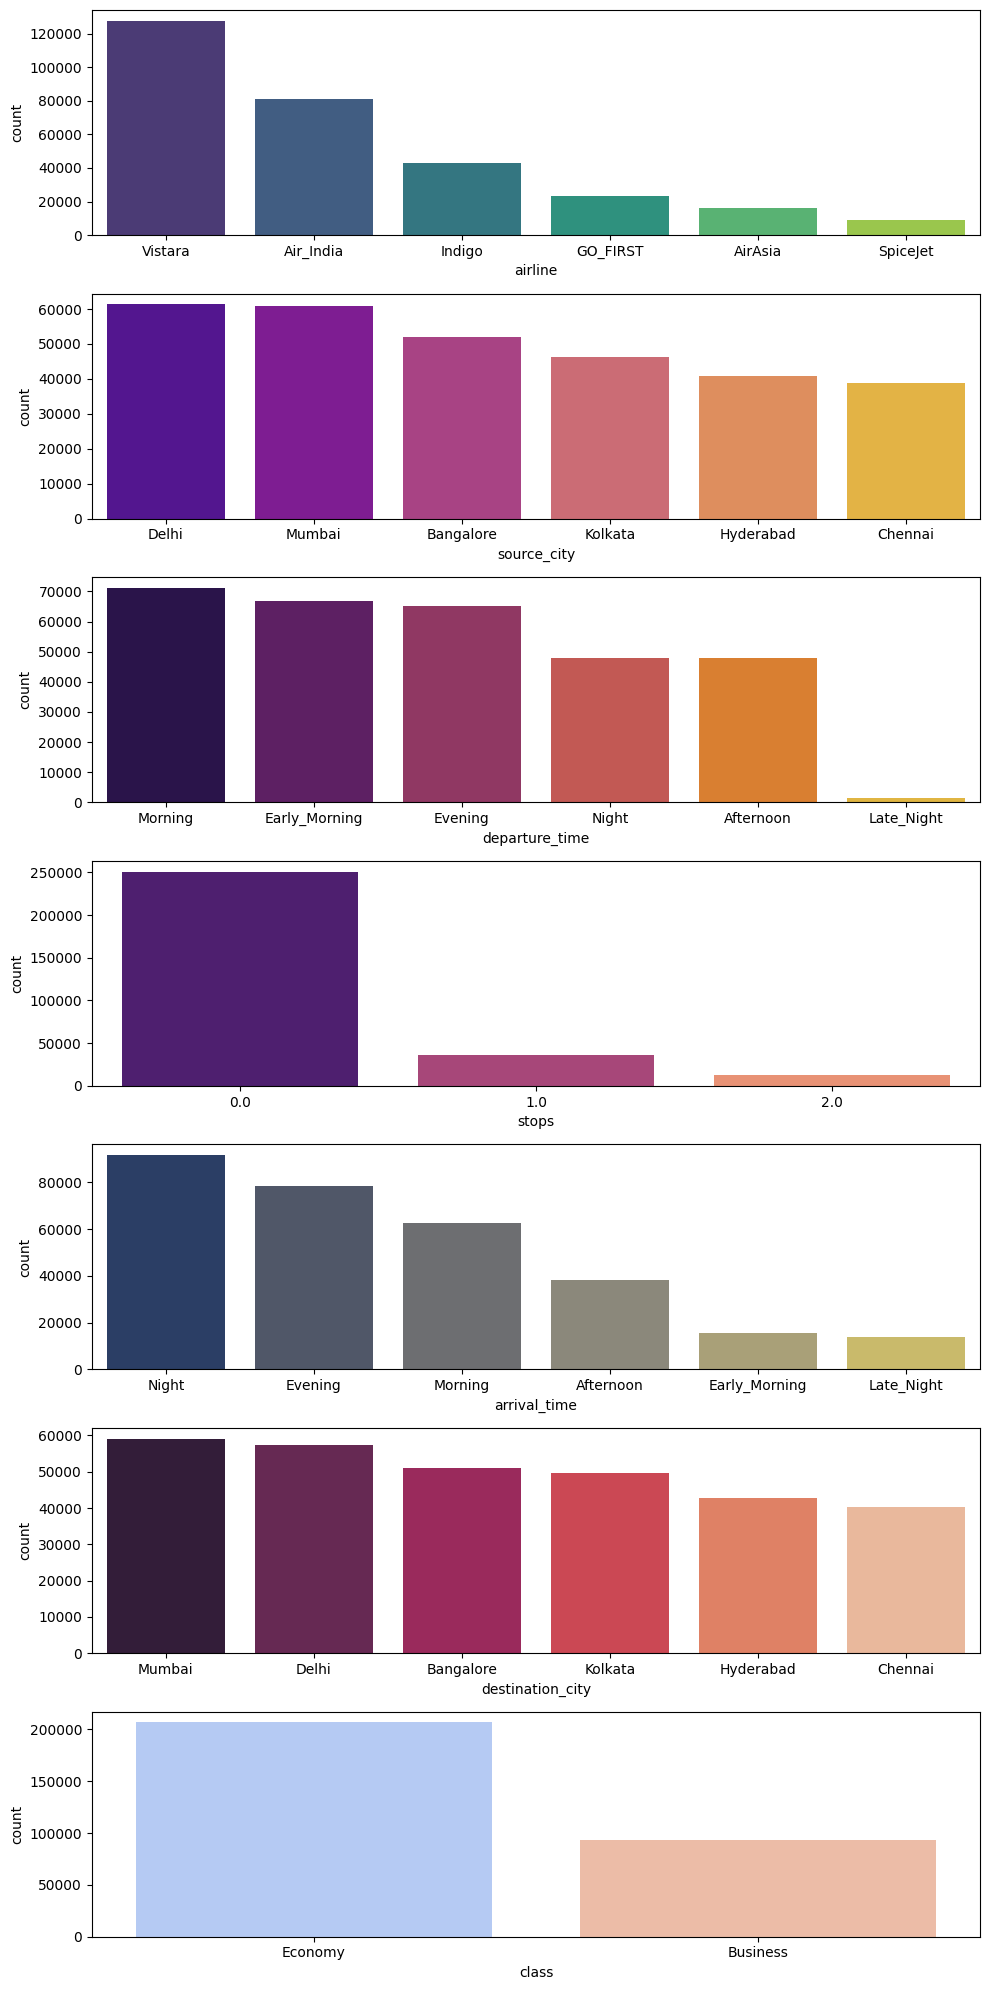

In [9]:
line = df.columns
line = line.drop(['flight', 'duration', 'days_left', 'price'])  # Fixed the string literal by removing extra quote
num_col = 1
num_rows = (len(line) + num_col - 1) // num_col
palette = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'rocket', 'coolwarm']

plt.subplots(num_rows, num_col, figsize=(10, 20))
for index, col in enumerate(line):
    plt.subplot(num_rows, num_col, index+1)
    df_group = df[col].value_counts().reset_index()
    df_group.columns = [col, 'count']
    sns.barplot(x=col, y='count', data=df_group, palette=palette[index])
plt.tight_layout()
plt.show()

/tmp/ipykernel_105/2477025126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trip', y='count', data=df_group, palette='viridis')


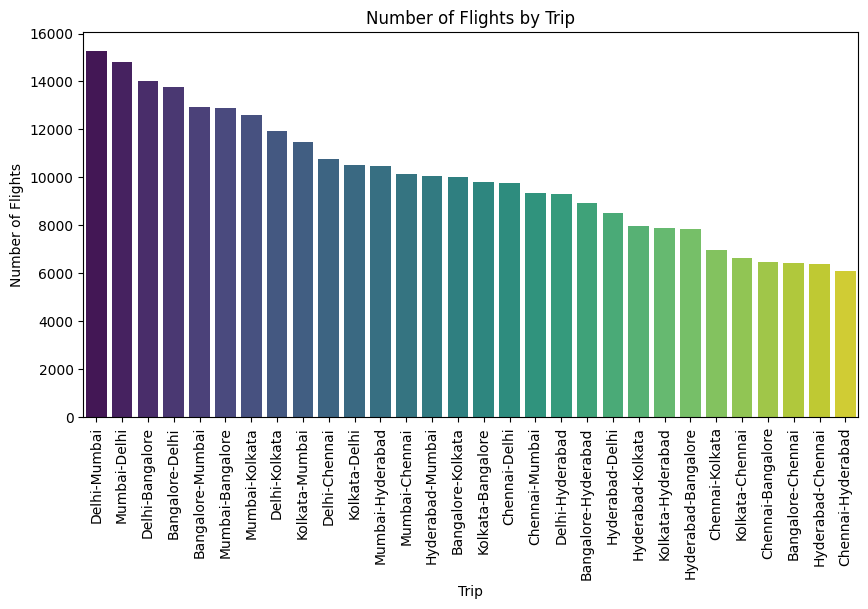

In [10]:
df['trip'] = df['source_city'] + '-' + df['destination_city']
df_group = df['trip'].value_counts().reset_index()
df_group.columns = ['trip', 'count']
plt.figure(figsize=(10, 5))
sns.barplot(x='trip', y='count', data=df_group, palette='viridis')
plt.title('Number of Flights by Trip')
plt.xlabel('Trip')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

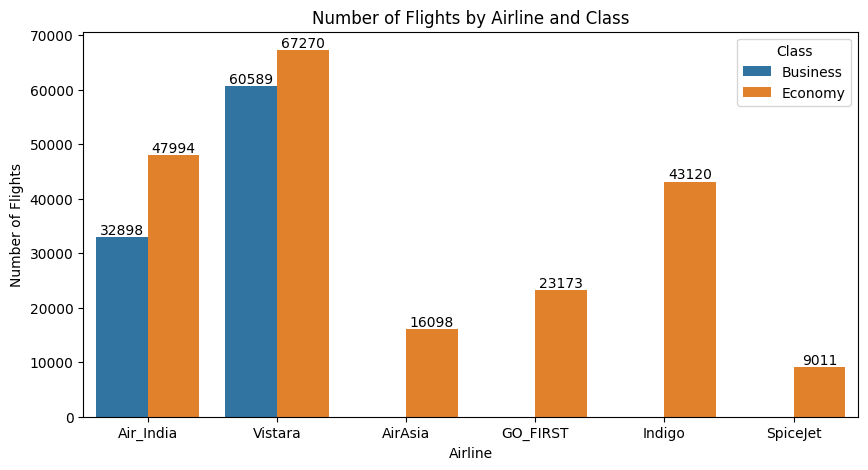

In [11]:
df_group = df.groupby(['class', 'airline']).agg({'flight': 'count'}).reset_index()

plt.figure(figsize=(10, 5), dpi=100)
ax = sns.barplot(data=df_group, x='airline', y='flight', hue='class')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Number of Flights by Airline and Class')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.legend(title='Class')
plt.show()

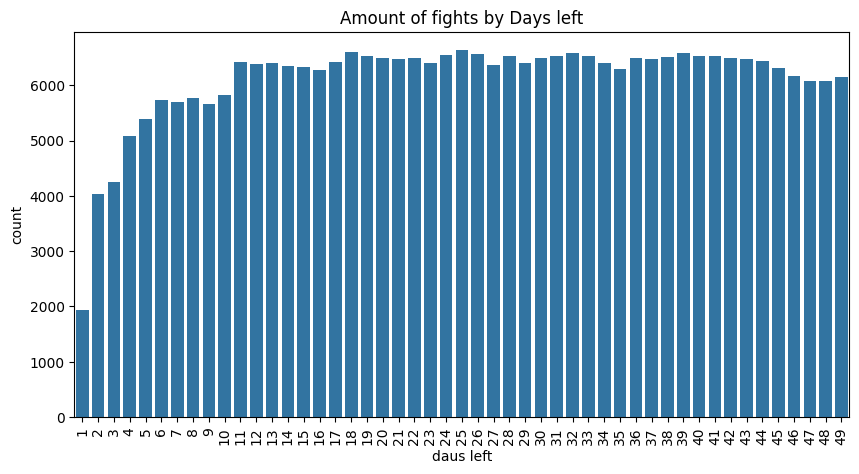

In [12]:
plt.figure(figsize=(10, 5))
df_group = df['days_left'].value_counts().reset_index()
df_group.columns = ['days_left', 'count']
sns.barplot(data=df_group, x='days_left', y='count')
plt.title('Amount of fights by Days left')
plt.xlabel('daus left')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

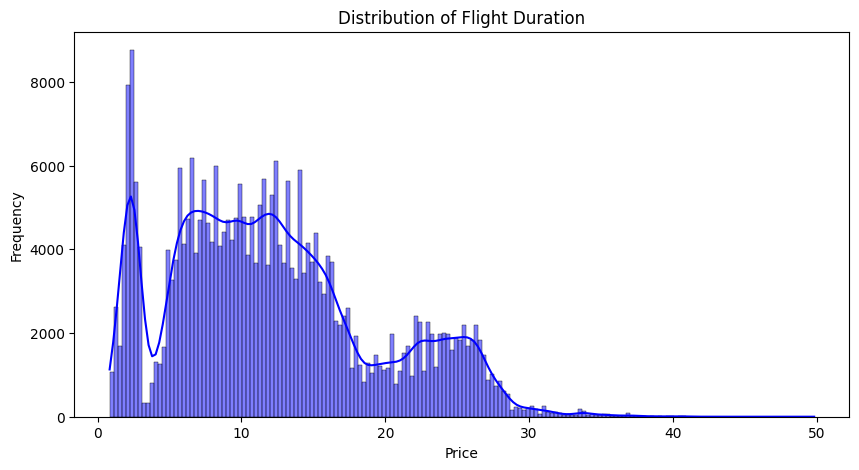

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], kde=True, color='blue')
plt.title('Distribution of Flight Duration')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

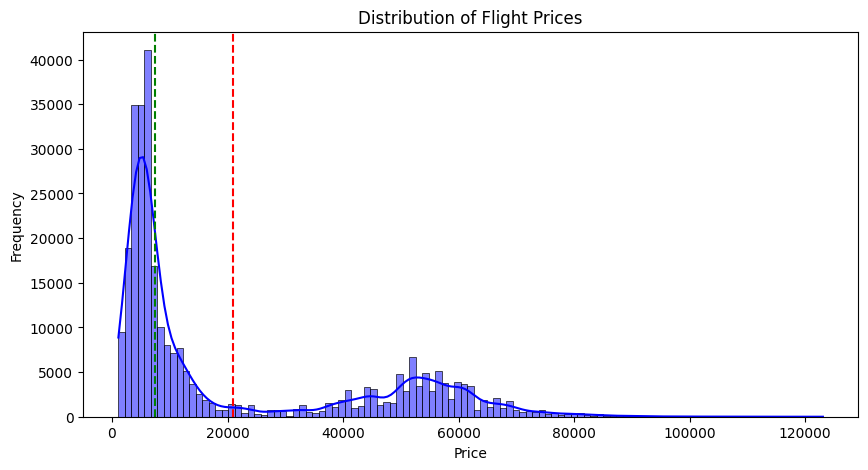

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, color='blue')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_105/3860486663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_group.index, y=df_group['price'], palette='viridis')


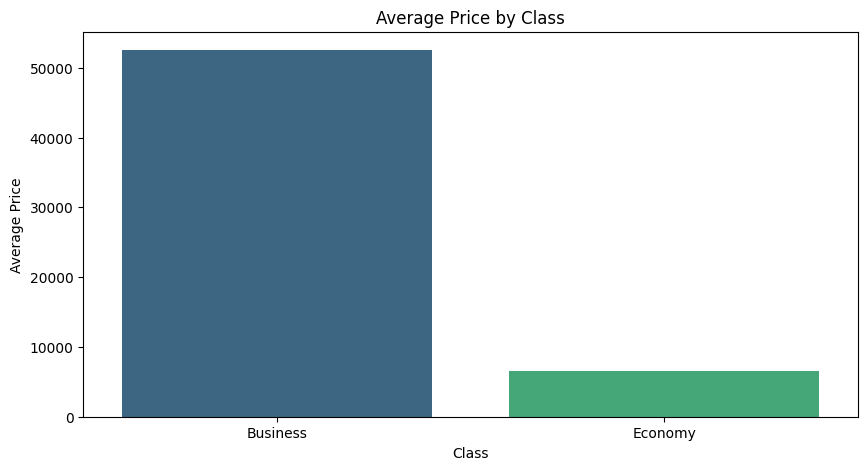

In [15]:
df_group = df.groupby('class').agg({'price': 'mean'})

plt.figure(figsize=(10, 5))
sns.barplot(x=df_group.index, y=df_group['price'], palette='viridis')
plt.title('Average Price by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()

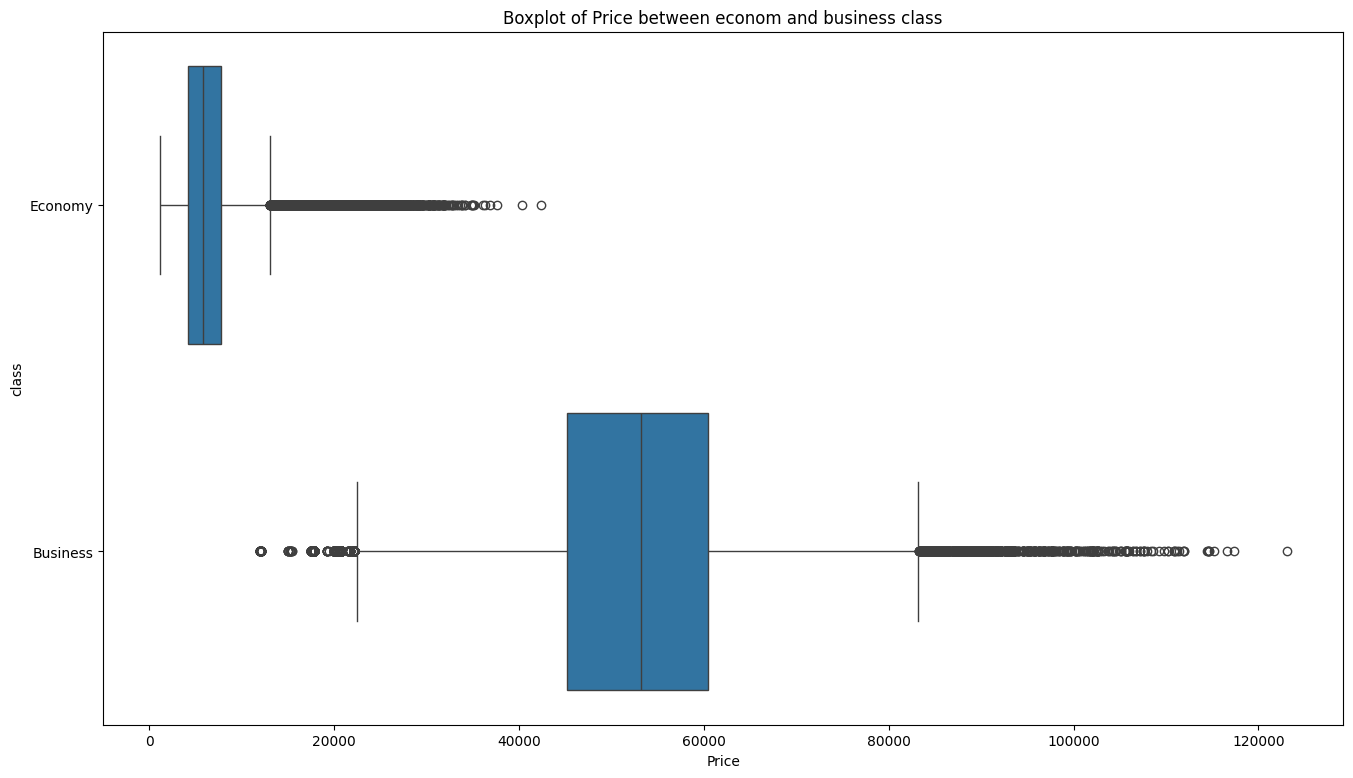

In [16]:
plt.figure(figsize=(16,9))
sns.boxplot(df, x='price', y='class', orient='y')
plt.title('Boxplot of Price between econom and business class')
plt.xlabel('Price')
plt.show()

In [17]:
df_econom = df.query("`class` == 'Economy'")
df_business = df.query("`class` == 'Business'")

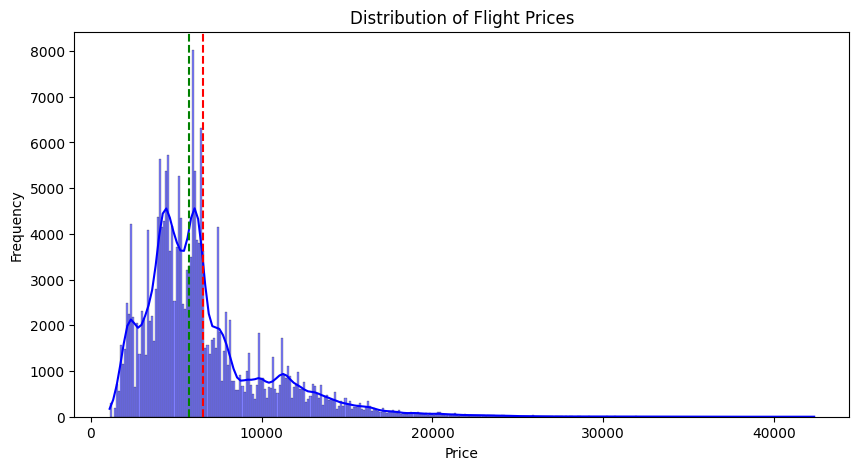

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df_econom['price'], kde=True, color='blue')
plt.axvline(df_econom['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_econom['price'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

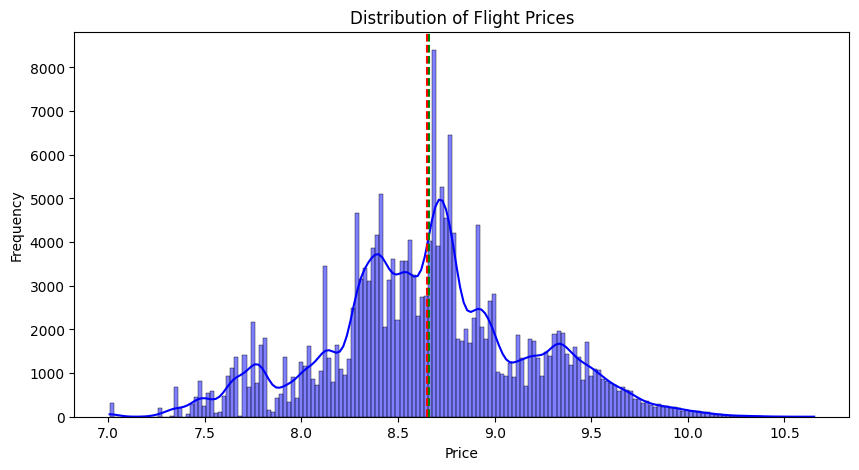

In [19]:
df_group = df_econom.copy()
df_group['price'] = np.log(df_group['price'])

plt.figure(figsize=(10, 5))
sns.histplot(df_group['price'], kde=True, color='blue')
plt.axvline(df_group['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_group['price'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

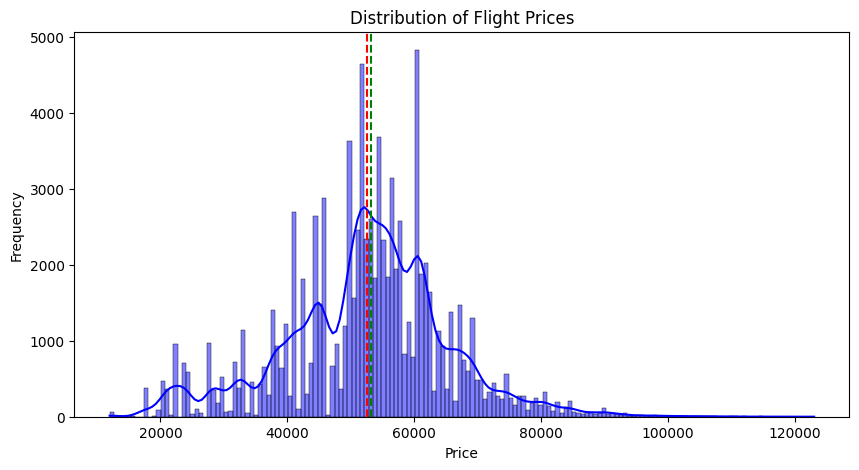

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df_business['price'], kde=True, color='blue')
plt.axvline(df_business['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_business['price'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [21]:
df_econom.describe()

,stops,duration,days_left,price
count,206666.000000,206666.000000,206666.000000,206666.000000
mean,0.253104,11.550060,26.123673,6572.342383
std,0.554200,7.241284,13.529610,3743.519517
min,0.000000,0.830000,1.000000,1105.000000
25%,0.000000,6.250000,15.000000,4173.000000
50%,0.000000,10.170000,26.000000,5772.000000
75%,0.000000,15.250000,38.000000,7746.000000
max,2.000000,49.830000,49.000000,42349.000000


In [22]:
df_business.describe()

,stops,duration,days_left,price
count,93487.000000,93487.000000,93487.000000,93487.000000
mean,0.109833,13.704274,25.741857,52540.081124
std,0.347765,6.852555,13.626538,12969.314606
min,0.000000,1.000000,1.000000,12000.000000
25%,0.000000,8.830000,14.000000,45185.000000
50%,0.000000,13.080000,26.000000,53164.000000
75%,0.000000,17.830000,38.000000,60396.000000
max,2.000000,47.750000,49.000000,123071.000000


/tmp/ipykernel_105/2364449332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_group.index, y=df_group['price'], palette='viridis')


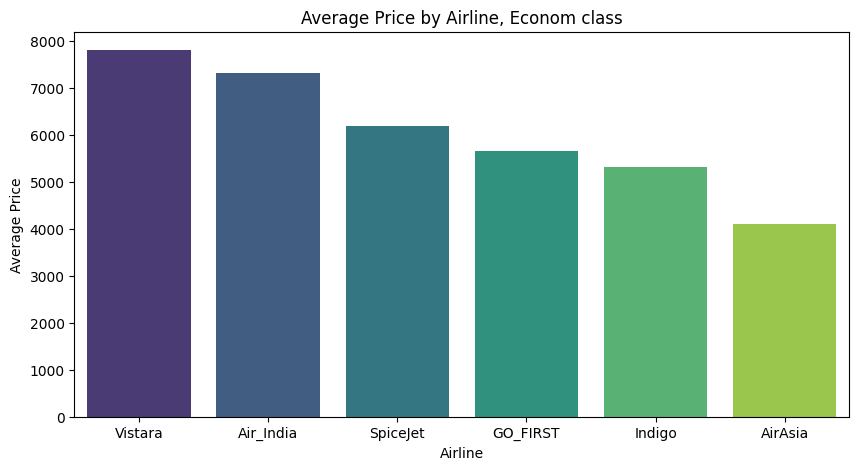

In [23]:
df_group = df_econom.groupby('airline').agg({'price': 'mean'})
df_group = df_group.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_group.index, y=df_group['price'], palette='viridis')
plt.title('Average Price by Airline, Econom class')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

/tmp/ipykernel_105/1187394926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_group.index, y=df_group['price'], palette='viridis')


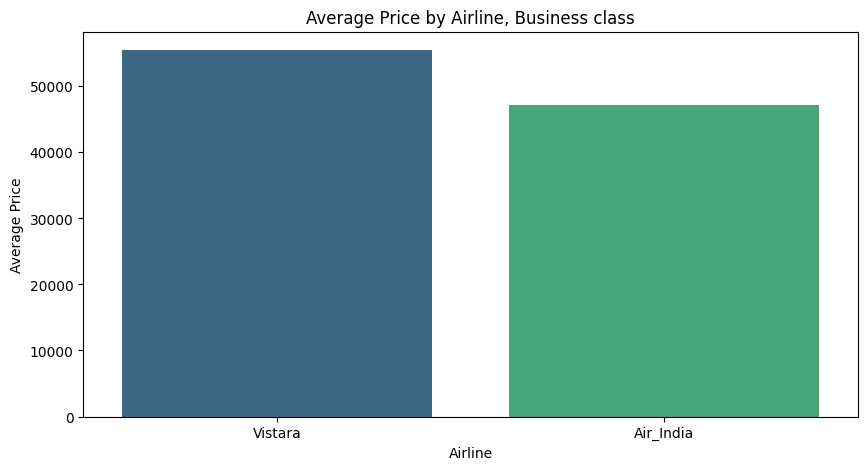

In [24]:
df_group = df_business.groupby('airline').agg({'price': 'mean'})
df_group = df_group.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_group.index, y=df_group['price'], palette='viridis')
plt.title('Average Price by Airline, Business class')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

/tmp/ipykernel_105/4172641823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_group.index, y=df_group['duration'], palette='magma')


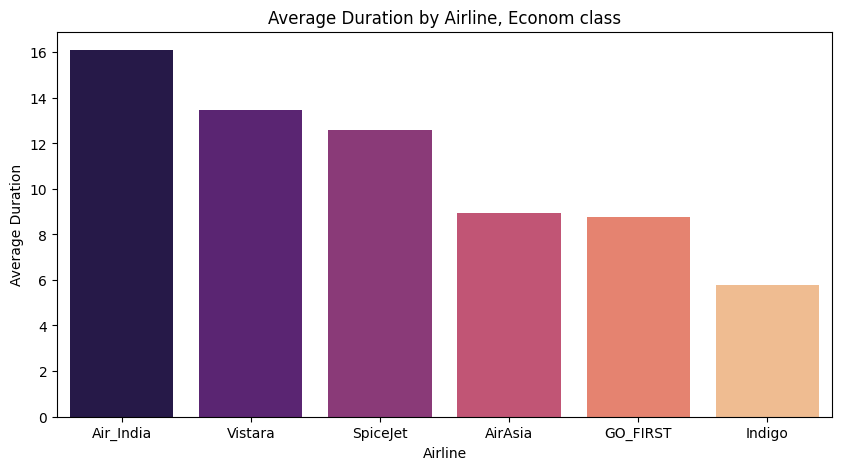

In [25]:
df_group = df_econom.groupby('airline').agg({'duration': 'mean'})
df_group = df_group.sort_values(by='duration', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_group.index, y=df_group['duration'], palette='magma')
plt.title('Average Duration by Airline, Econom class')
plt.xlabel('Airline')
plt.ylabel('Average Duration')
plt.show()

/tmp/ipykernel_105/3578069599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_group.index, y=df_group['duration'], palette='magma')


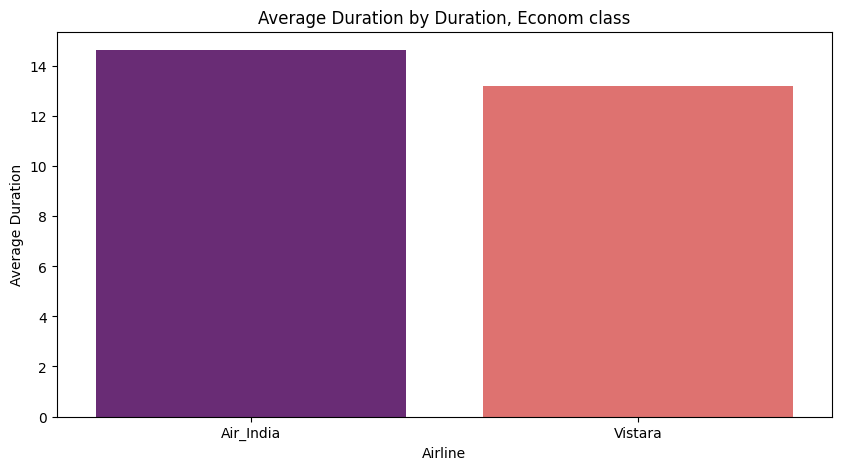

In [26]:
df_group = df_business.groupby('airline').agg({'duration': 'mean'})
df_group = df_group.sort_values(by='duration', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_group.index, y=df_group['duration'], palette='magma')
plt.title('Average Duration by Duration, Econom class')
plt.xlabel('Airline')
plt.ylabel('Average Duration')
plt.show()

In [27]:
df.describe()

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.208480,12.221021,26.004751,20889.660523
std,0.503533,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,0.000000,6.830000,15.000000,4783.000000
50%,0.000000,11.250000,26.000000,7425.000000
75%,0.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


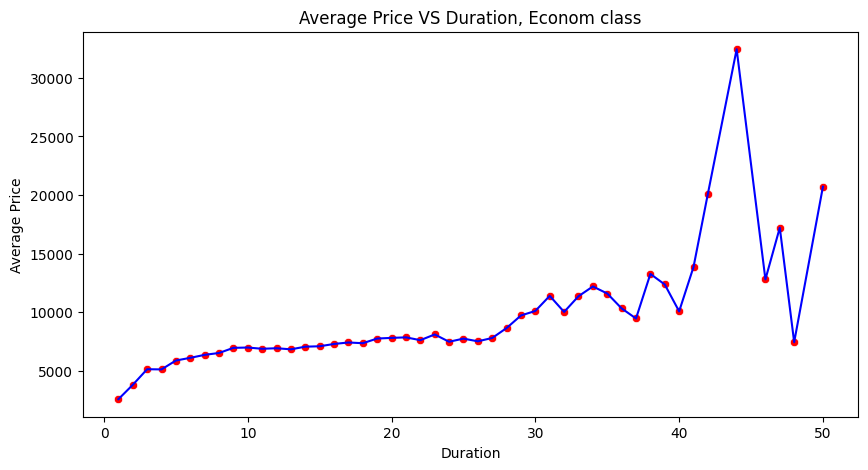

In [28]:
x_col = 'int_duration'
df_group = df_econom[['duration', 'price']].copy()
df_group[x_col] = df_group['duration'].round().astype('int')
del df_group['duration']
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by=x_col)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_col, y='price', data=df_group, color='red')
plt.plot(df_group[x_col], df_group['price'], color='blue')
plt.title('Average Price VS Duration, Econom class')
plt.xlabel('Duration')
plt.ylabel('Average Price')
plt.show()

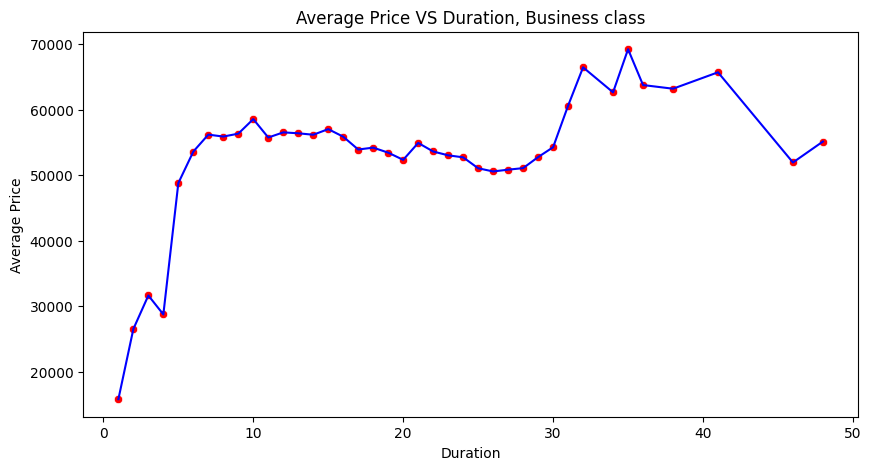

In [29]:
x_col = 'int_duration'
df_group = df_business[['duration', 'price']].copy()
df_group[x_col] = df_group['duration'].round().astype('int')
del df_group['duration']
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by=x_col)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_col, y='price', data=df_group, color='red')
plt.plot(df_group[x_col], df_group['price'], color='blue')
plt.title('Average Price VS Duration, Business class')
plt.xlabel('Duration')
plt.ylabel('Average Price')
plt.show()

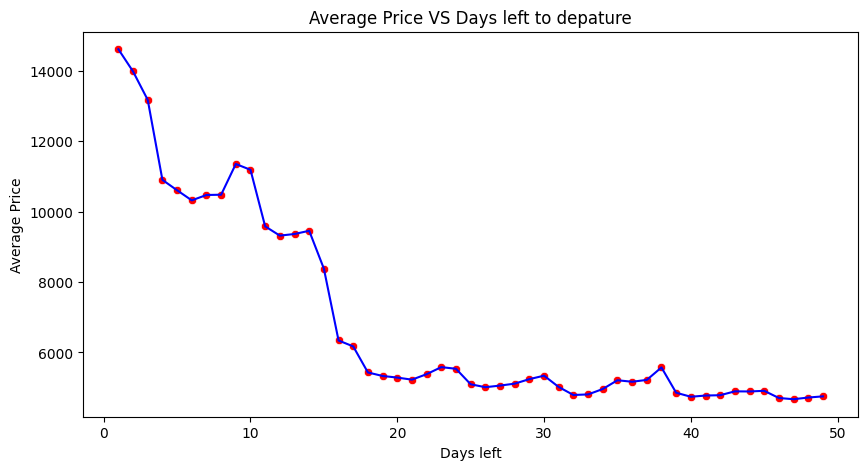

In [30]:
x_col = 'days_left'
df_group = df_econom[[x_col, 'price']].copy()
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by=x_col)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_col, y='price', data=df_group, color='red')
plt.plot(df_group[x_col], df_group['price'], color='blue')
plt.title('Average Price VS Days left to depature')
plt.xlabel('Days left')
plt.ylabel('Average Price')
plt.show()

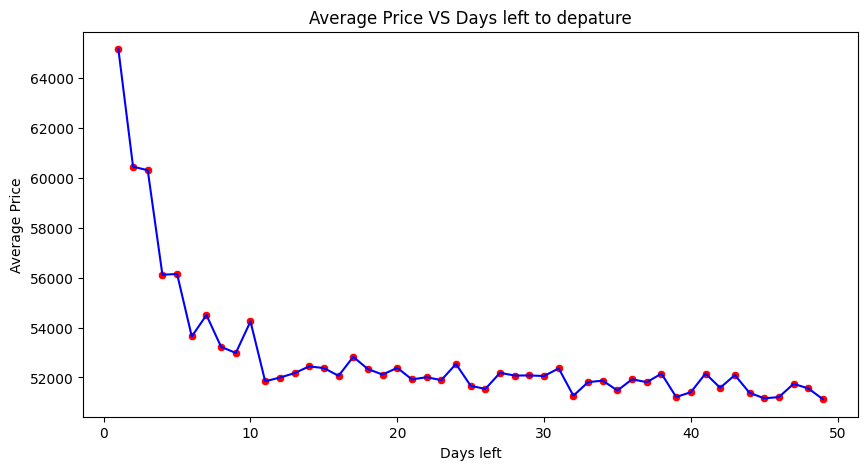

In [31]:
x_col = 'days_left'
df_group = df_business[[x_col, 'price']].copy()
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by=x_col)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_col, y='price', data=df_group, color='red')
plt.plot(df_group[x_col], df_group['price'], color='blue')
plt.title('Average Price VS Days left to depature')
plt.xlabel('Days left')
plt.ylabel('Average Price')
plt.show()

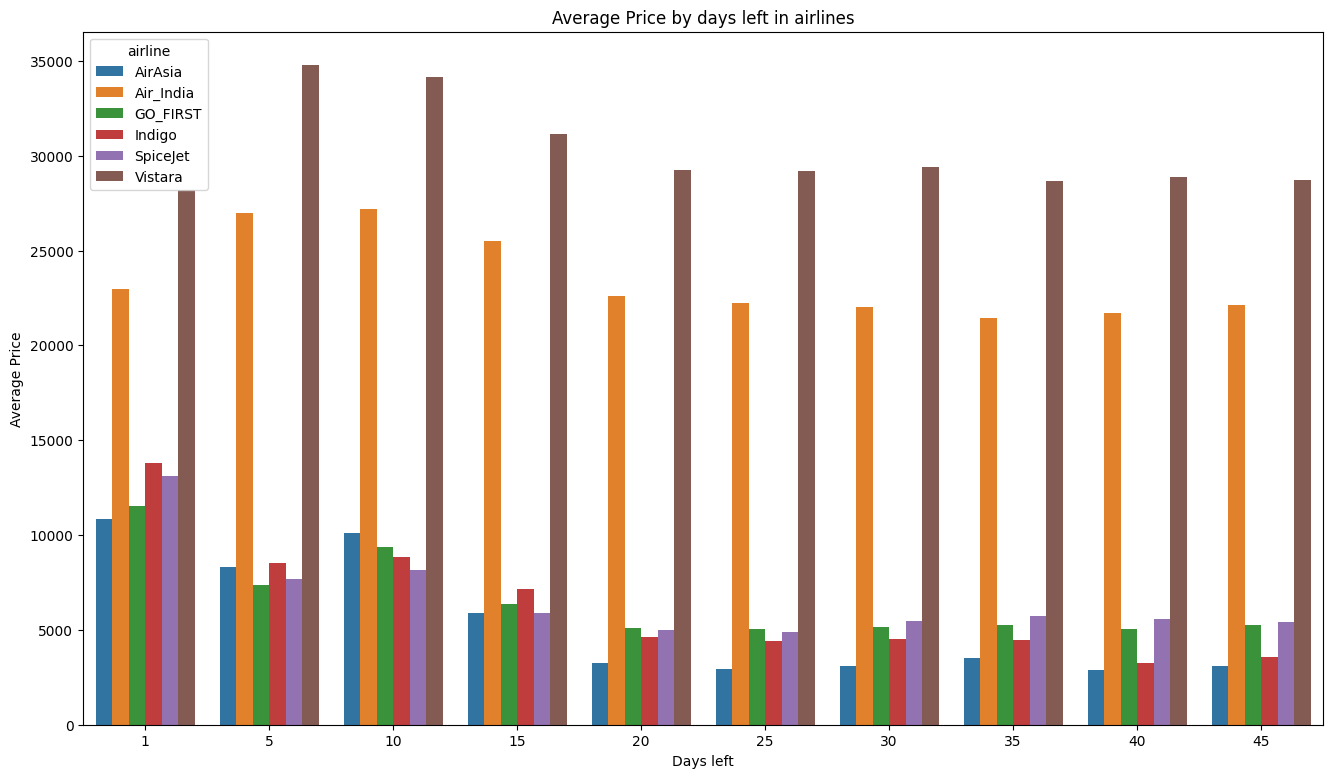

In [32]:
line = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
df_group = df[['days_left', 'price', 'airline']].copy()
df_group = df_group.groupby(['airline', 'days_left']).agg({'price': 'mean'}).reset_index()
df_group = df_group[df_group['days_left'].isin(line)]

plt.figure(figsize=(16, 9))
sns.barplot(x='days_left', y='price', data=df_group, hue='airline')
plt.title('Average Price by days left in airlines')
plt.xlabel('Days left')
plt.ylabel('Average Price')
plt.show()

/tmp/ipykernel_105/212262015.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='price', data=df_group, palette=colors)


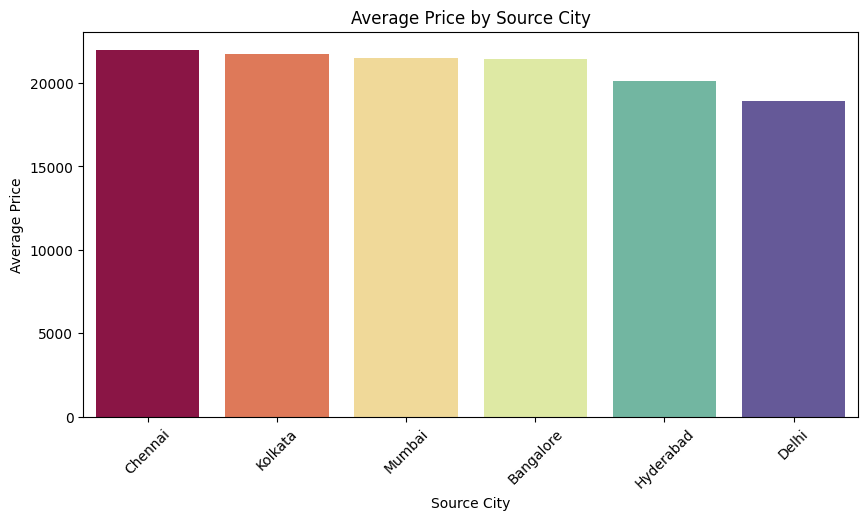

In [33]:
x_col = 'source_city'
df_group = df[[x_col, 'price']].copy()
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)
colors = [plt.cm.Spectral(i/float(len(df_group)-1)) for i in range(len(df_group))]

plt.figure(figsize=(10, 5))
sns.barplot(x=x_col, y='price', data=df_group, palette=colors)
plt.title('Average Price by Source City')
plt.xlabel('Source City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

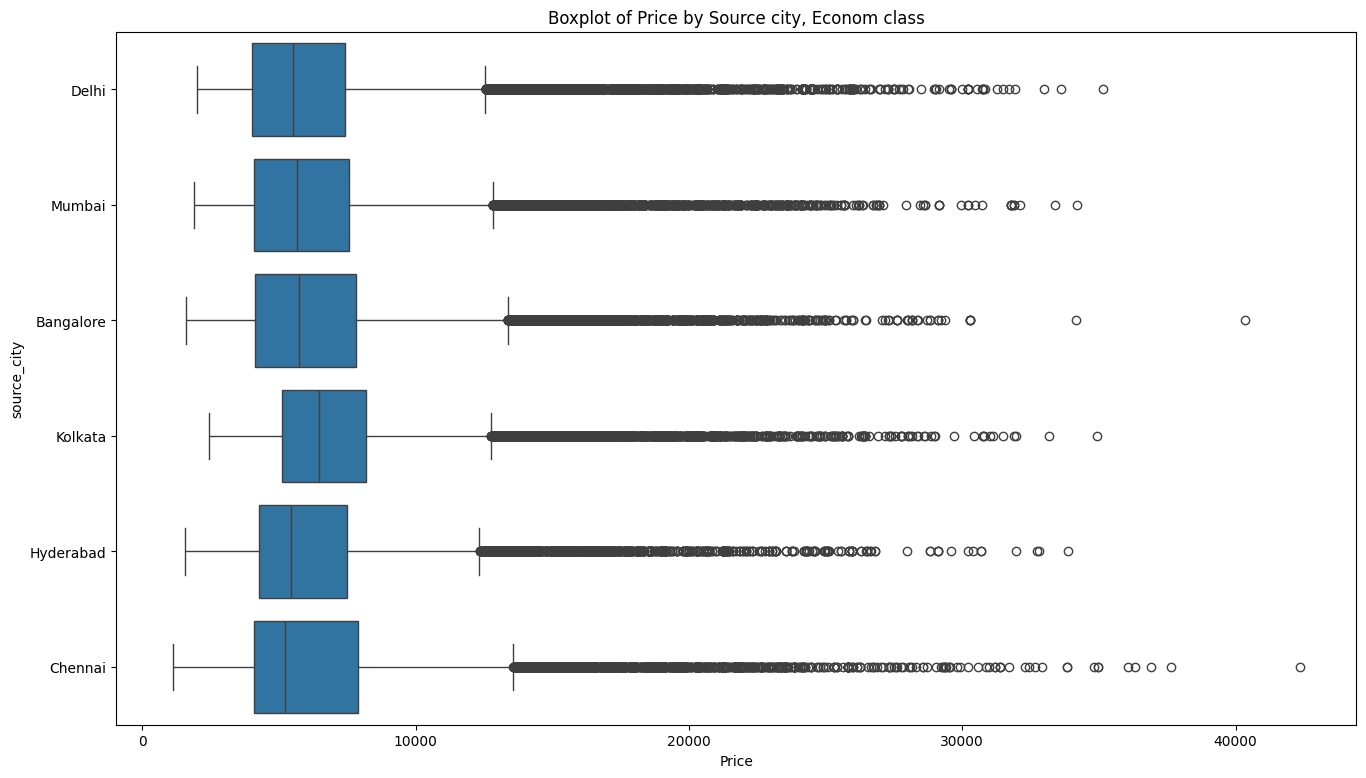

In [34]:
plt.figure(figsize=(16,9))
sns.boxplot(df_econom, x='price', y='source_city', orient='y')
plt.title('Boxplot of Price by Source city, Econom class')
plt.xlabel('Price')
plt.show()

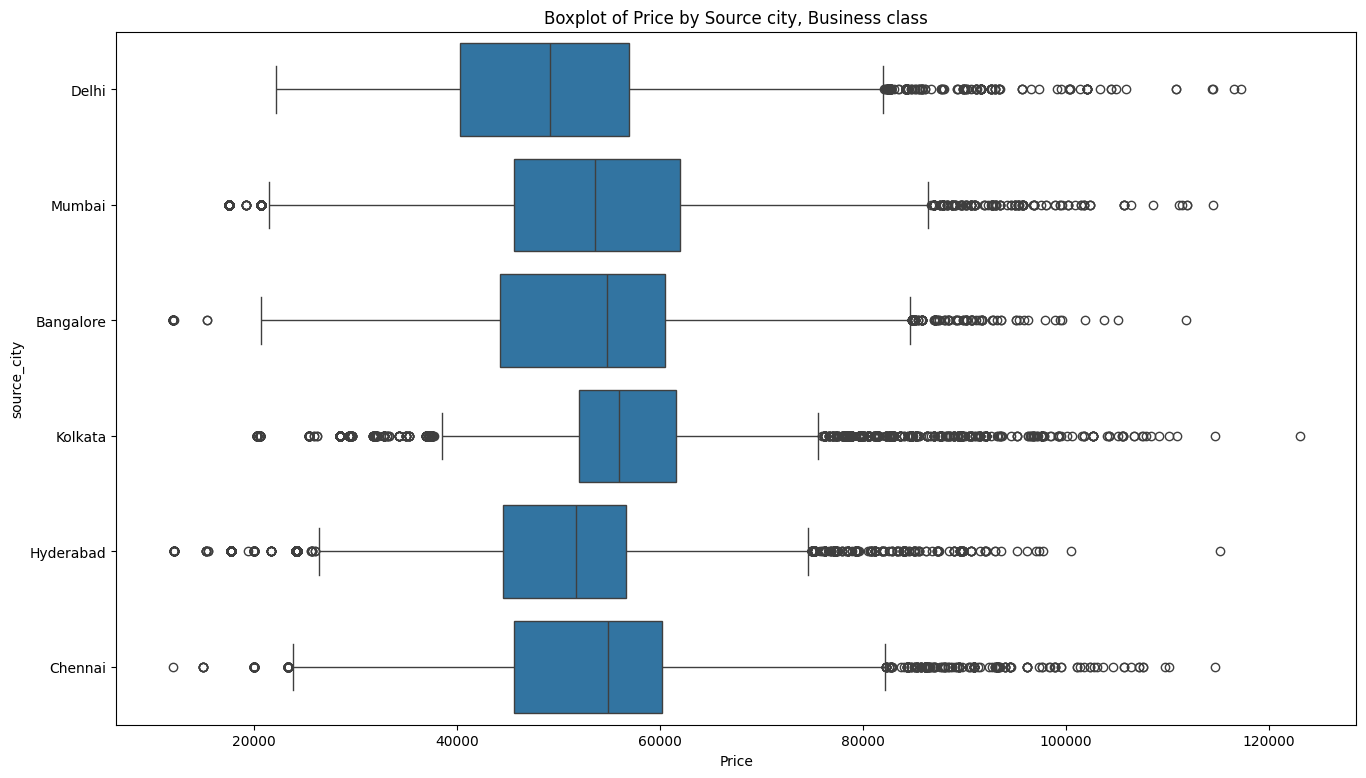

In [35]:
plt.figure(figsize=(16,9))
sns.boxplot(df_business, x='price', y='source_city', orient='y')
plt.title('Boxplot of Price by Source city, Business class')
plt.xlabel('Price')
plt.show()

/tmp/ipykernel_105/3929786766.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='price', data=df_group, palette=colors)


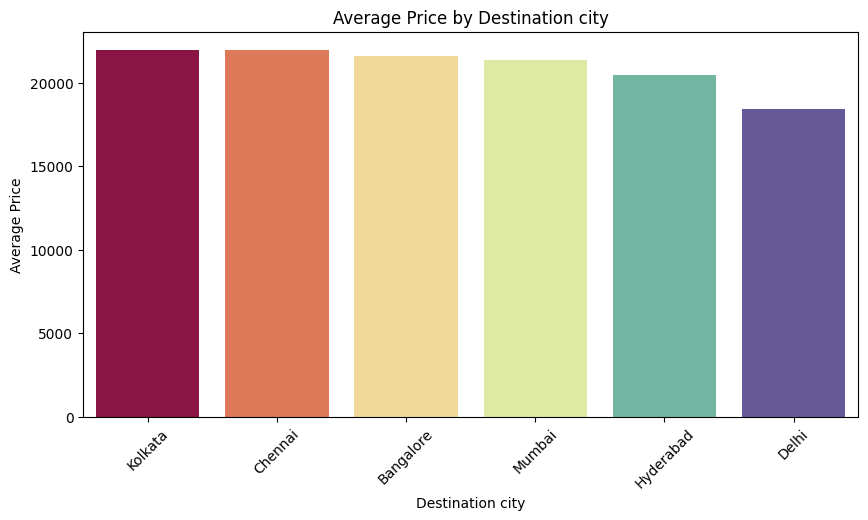

In [36]:
x_col = 'destination_city'
df_group = df[[x_col, 'price']].copy()
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)
colors = [plt.cm.Spectral(i/float(len(df_group)-1)) for i in range(len(df_group))]

plt.figure(figsize=(10, 5))
sns.barplot(x=x_col, y='price', data=df_group, palette=colors)
plt.title('Average Price by Destination city')
plt.xlabel('Destination city')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

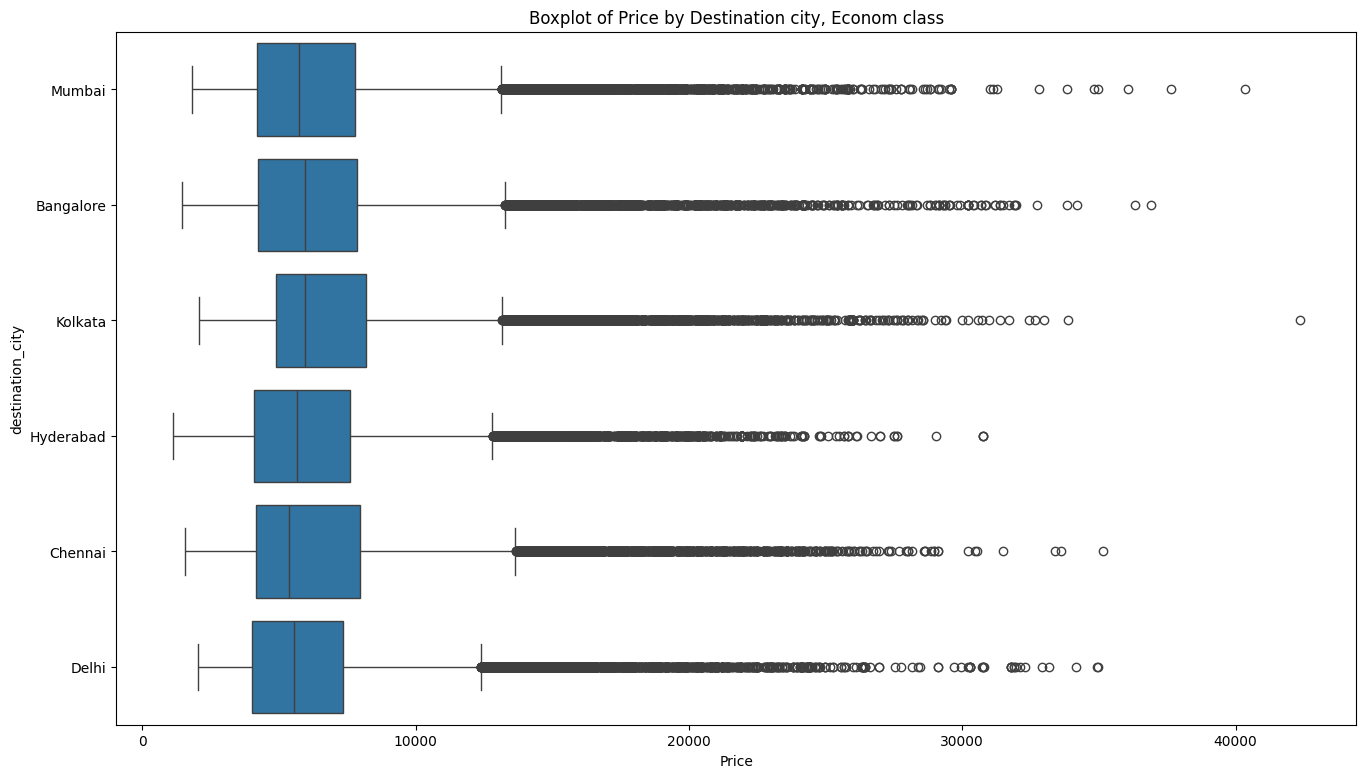

In [37]:
plt.figure(figsize=(16,9))
sns.boxplot(df_econom, x='price', y='destination_city', orient='y')
plt.title('Boxplot of Price by Destination city, Econom class')
plt.xlabel('Price')
plt.show()

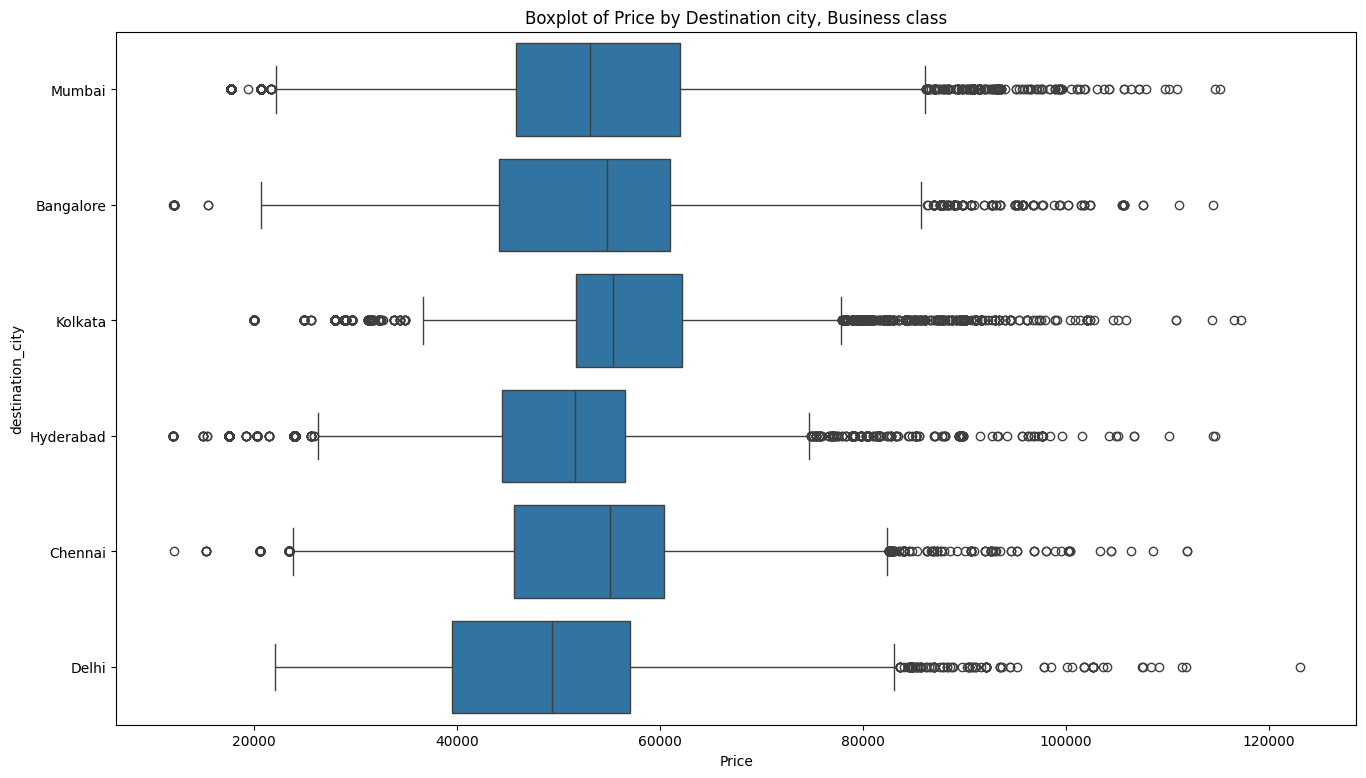

In [38]:
plt.figure(figsize=(16,9))
sns.boxplot(df_business, x='price', y='destination_city', orient='y')
plt.title('Boxplot of Price by Destination city, Business class')
plt.xlabel('Price')
plt.show()

In [39]:
from scipy import stats

data_group1 = df[df['destination_city'] == 'Bangalore']['price']
data_group2 = df[df['destination_city'] == 'Chennai']['price']
data_group3 = df[df['destination_city'] == 'Delhi']['price']
data_group4 = df[df['destination_city'] == 'Hyderabad']['price']
data_group5 = df[df['destination_city'] == 'Kolkata']['price']
data_group6 = df[df['destination_city'] == 'Mumbai']['price']

result = stats.kruskal(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6)
print(result)

KruskalResult(statistic=1603.3889486461671, pvalue=0.0)


/tmp/ipykernel_105/2694758164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=x_col, x='price', data=df_group, palette=colors, orient='y')


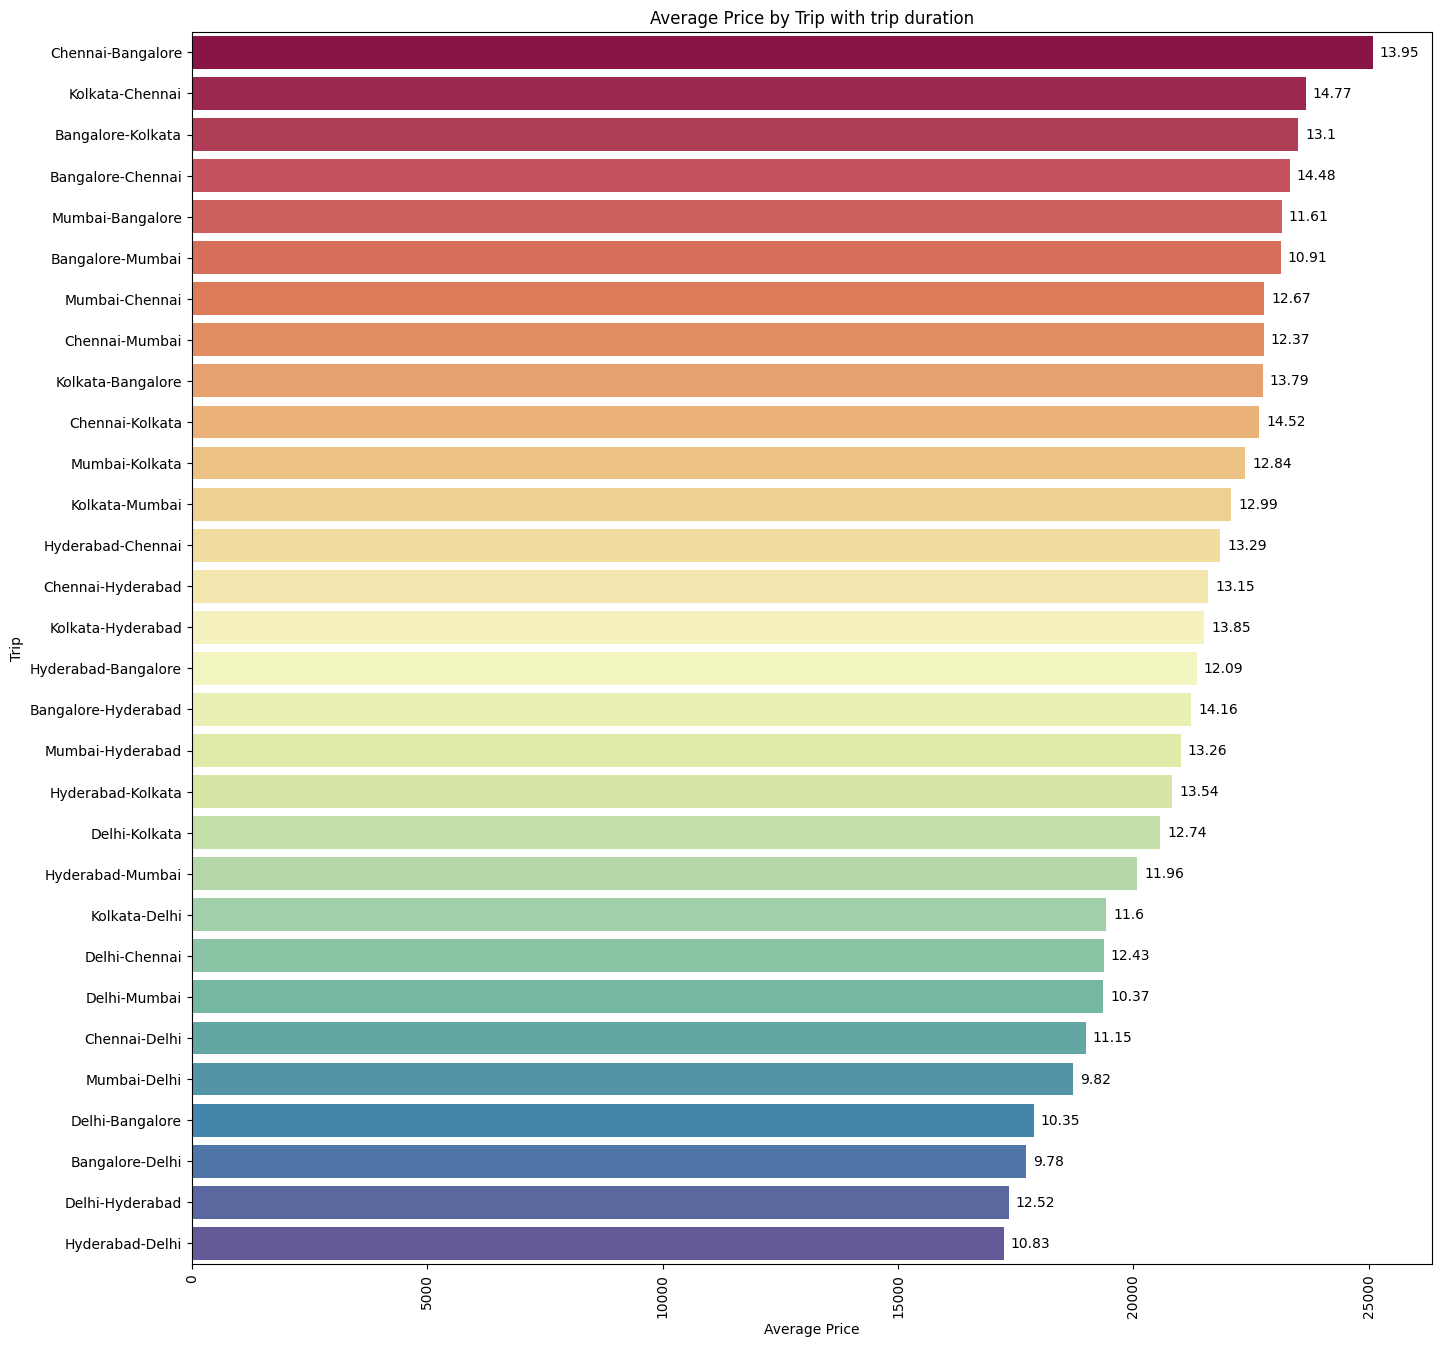

In [40]:
x_col = 'trip'
df_group = df[[x_col, 'price', 'duration']].copy()
df_group = df_group.groupby([x_col]).agg({'price': 'mean', 'duration': 'mean'}).reset_index().sort_values(by='price', ascending=False)
colors = [plt.cm.Spectral(i/float(len(df_group)-1)) for i in range(len(df_group))]

plt.figure(figsize=(16, 16))
ax = sns.barplot(y=x_col, x='price', data=df_group, palette=colors, orient='y')

durations = df_group['duration'].round(2)
for bar, duration in zip(ax.patches, durations):
    ax.annotate(f'{duration}',
                (bar.get_width(), bar.get_y() + bar.get_height()/2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center')

plt.title('Average Price by Trip with trip duration')
plt.xlabel('Average Price')
plt.ylabel('Trip')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_105/2159167426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='price', data=df_group, palette=colors)


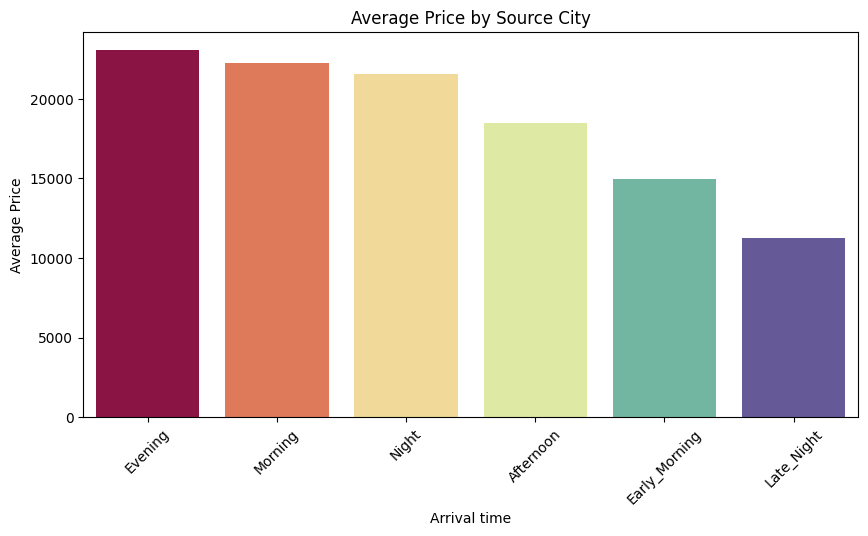

In [41]:
x_col = 'arrival_time'
df_group = df[[x_col, 'price']].copy()
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)
colors = [plt.cm.Spectral(i/float(len(df_group)-1)) for i in range(len(df_group))]

plt.figure(figsize=(10, 5))
sns.barplot(x=x_col, y='price', data=df_group, palette=colors)
plt.title('Average Price by Source City')
plt.xlabel('Arrival time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

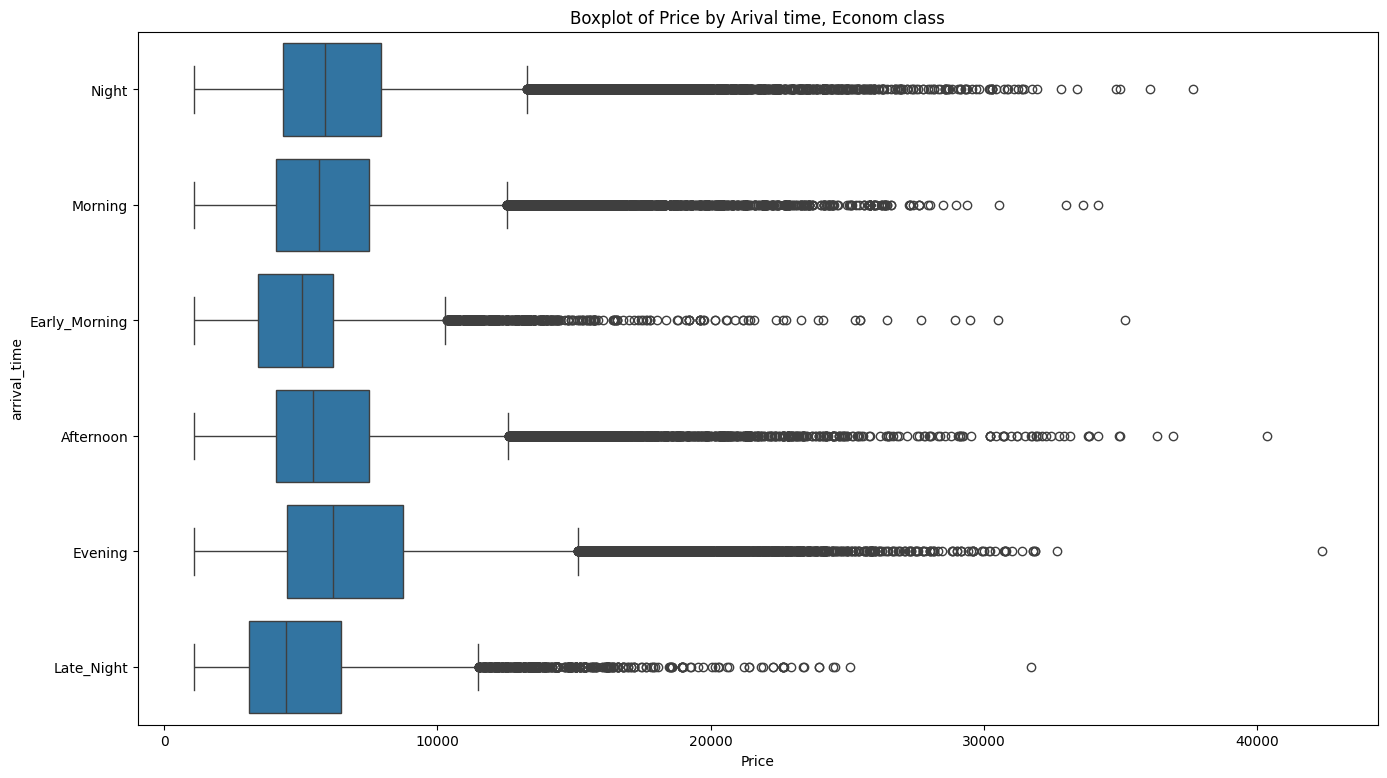

In [42]:
plt.figure(figsize=(16,9))
sns.boxplot(df_econom, x='price', y='arrival_time', orient='y')
plt.title('Boxplot of Price by Arival time, Econom class')
plt.xlabel('Price')
plt.show()

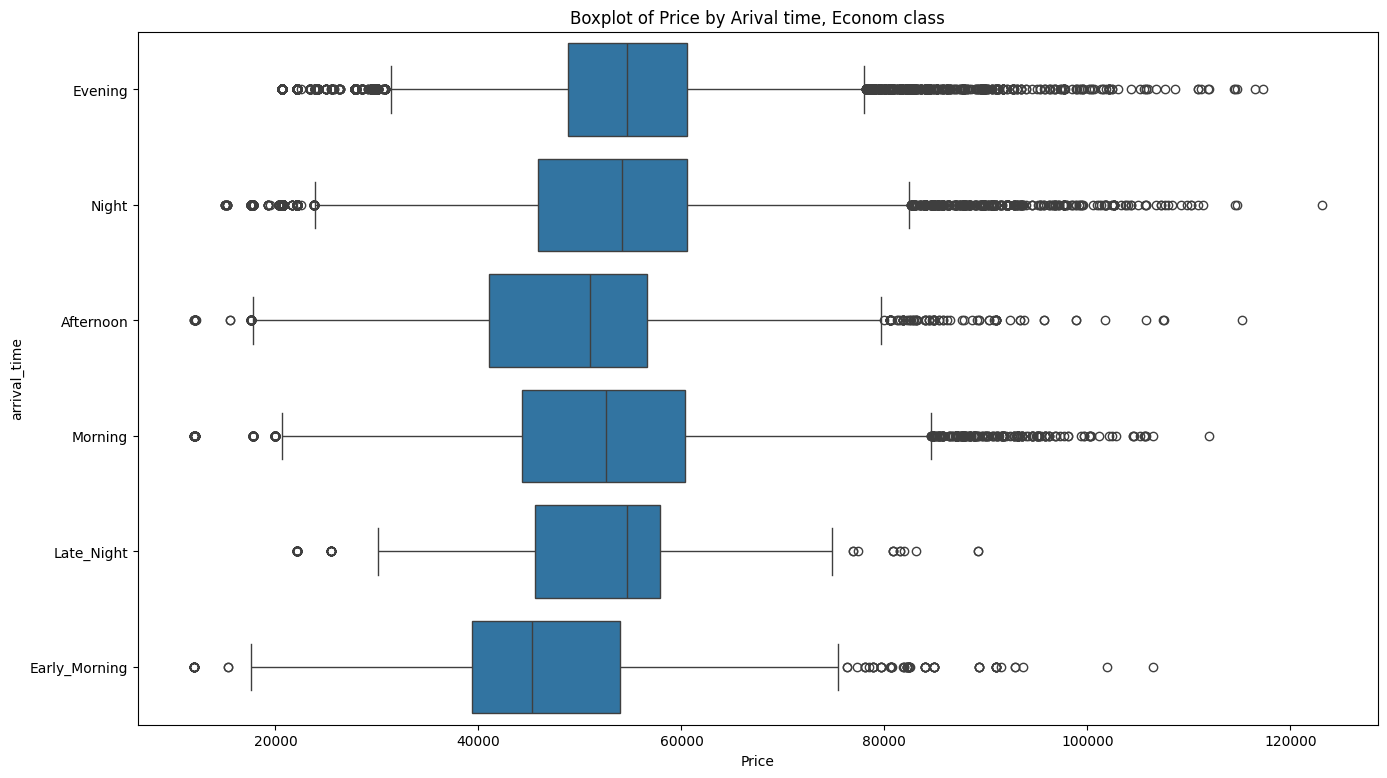

In [43]:
plt.figure(figsize=(16,9))
sns.boxplot(df_business, x='price', y='arrival_time', orient='y')
plt.title('Boxplot of Price by Arival time, Econom class')
plt.xlabel('Price')
plt.show()

/tmp/ipykernel_105/2665550533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y='price', data=df_group, palette=colors)


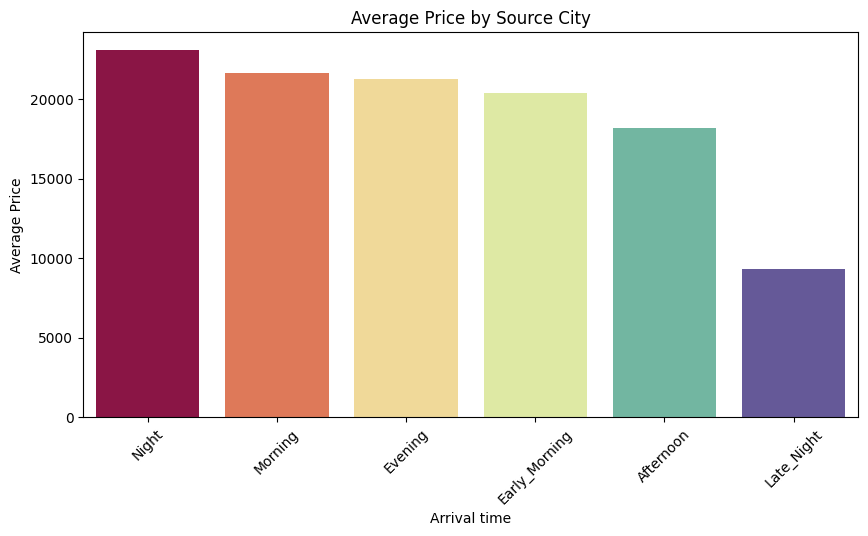

In [44]:
x_col = 'departure_time'
df_group = df[[x_col, 'price']].copy()
df_group = df_group.groupby(x_col).agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)
colors = [plt.cm.Spectral(i/float(len(df_group)-1)) for i in range(len(df_group))]

plt.figure(figsize=(10, 5))
sns.barplot(x=x_col, y='price', data=df_group, palette=colors)
plt.title('Average Price by Source City')
plt.xlabel('Arrival time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

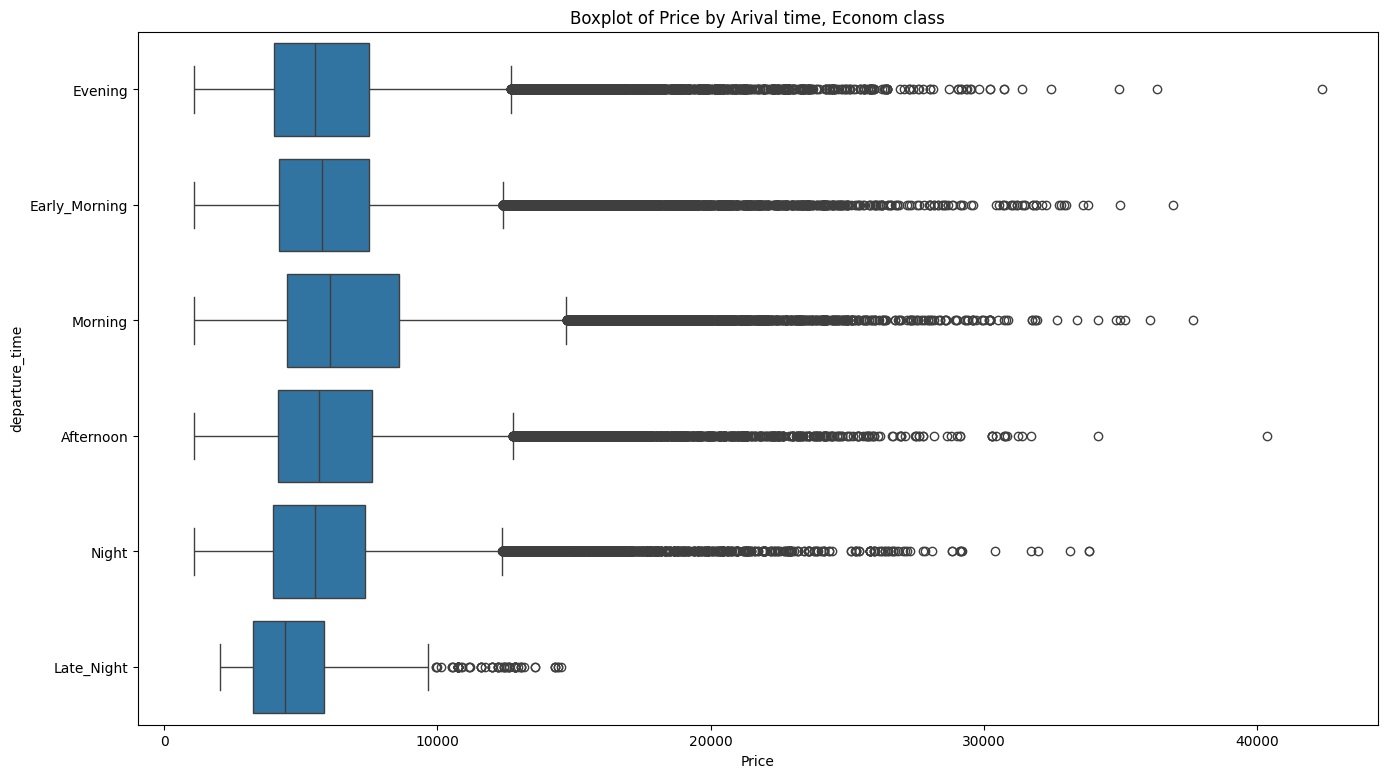

In [45]:
plt.figure(figsize=(16,9))
sns.boxplot(df_econom, x='price', y='departure_time', orient='y')
plt.title('Boxplot of Price by Arival time, Econom class')
plt.xlabel('Price')
plt.show()

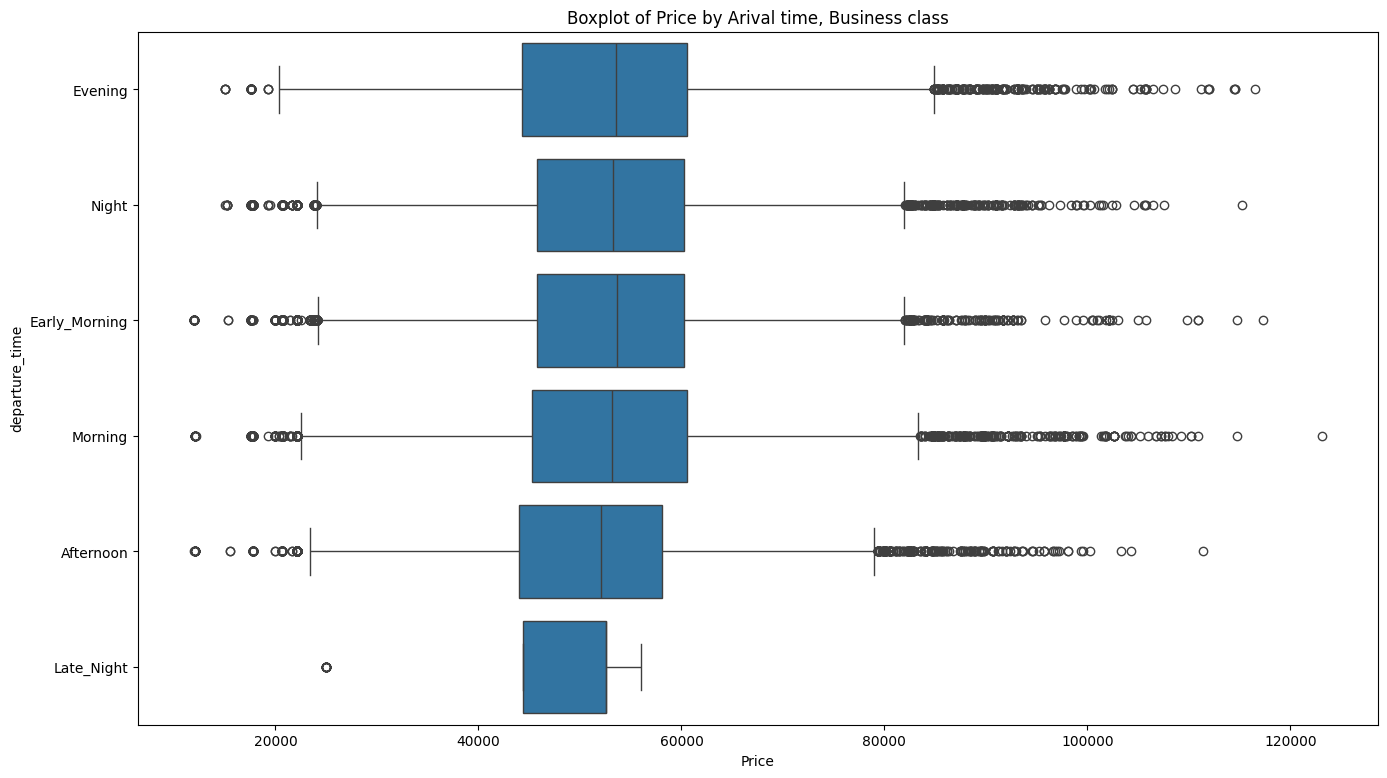

In [46]:
plt.figure(figsize=(16,9))
sns.boxplot(df_business, x='price', y='departure_time', orient='y')
plt.title('Boxplot of Price by Arival time, Business class')
plt.xlabel('Price')
plt.show()

In [47]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,trip
index,,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,1.0,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,1.0,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,1.0,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,1.0,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,1.0,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


In [48]:
df_model = df.copy()
del df_model['flight']
del df_model['trip']

In [49]:
df_model = pd.get_dummies(df_model, columns=['airline', 'source_city', 
    'departure_time', 'arrival_time', 'destination_city', 'class'], dtype=int)

In [50]:
df_model

,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,2.17,1,5953,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,1.0,2.33,1,5953,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,1.0,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.0,2.25,1,5955,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,1.0,2.33,1,5955,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.0,10.08,49,69265,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
300149,0.0,10.42,49,77105,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
300150,0.0,13.83,49,79099,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


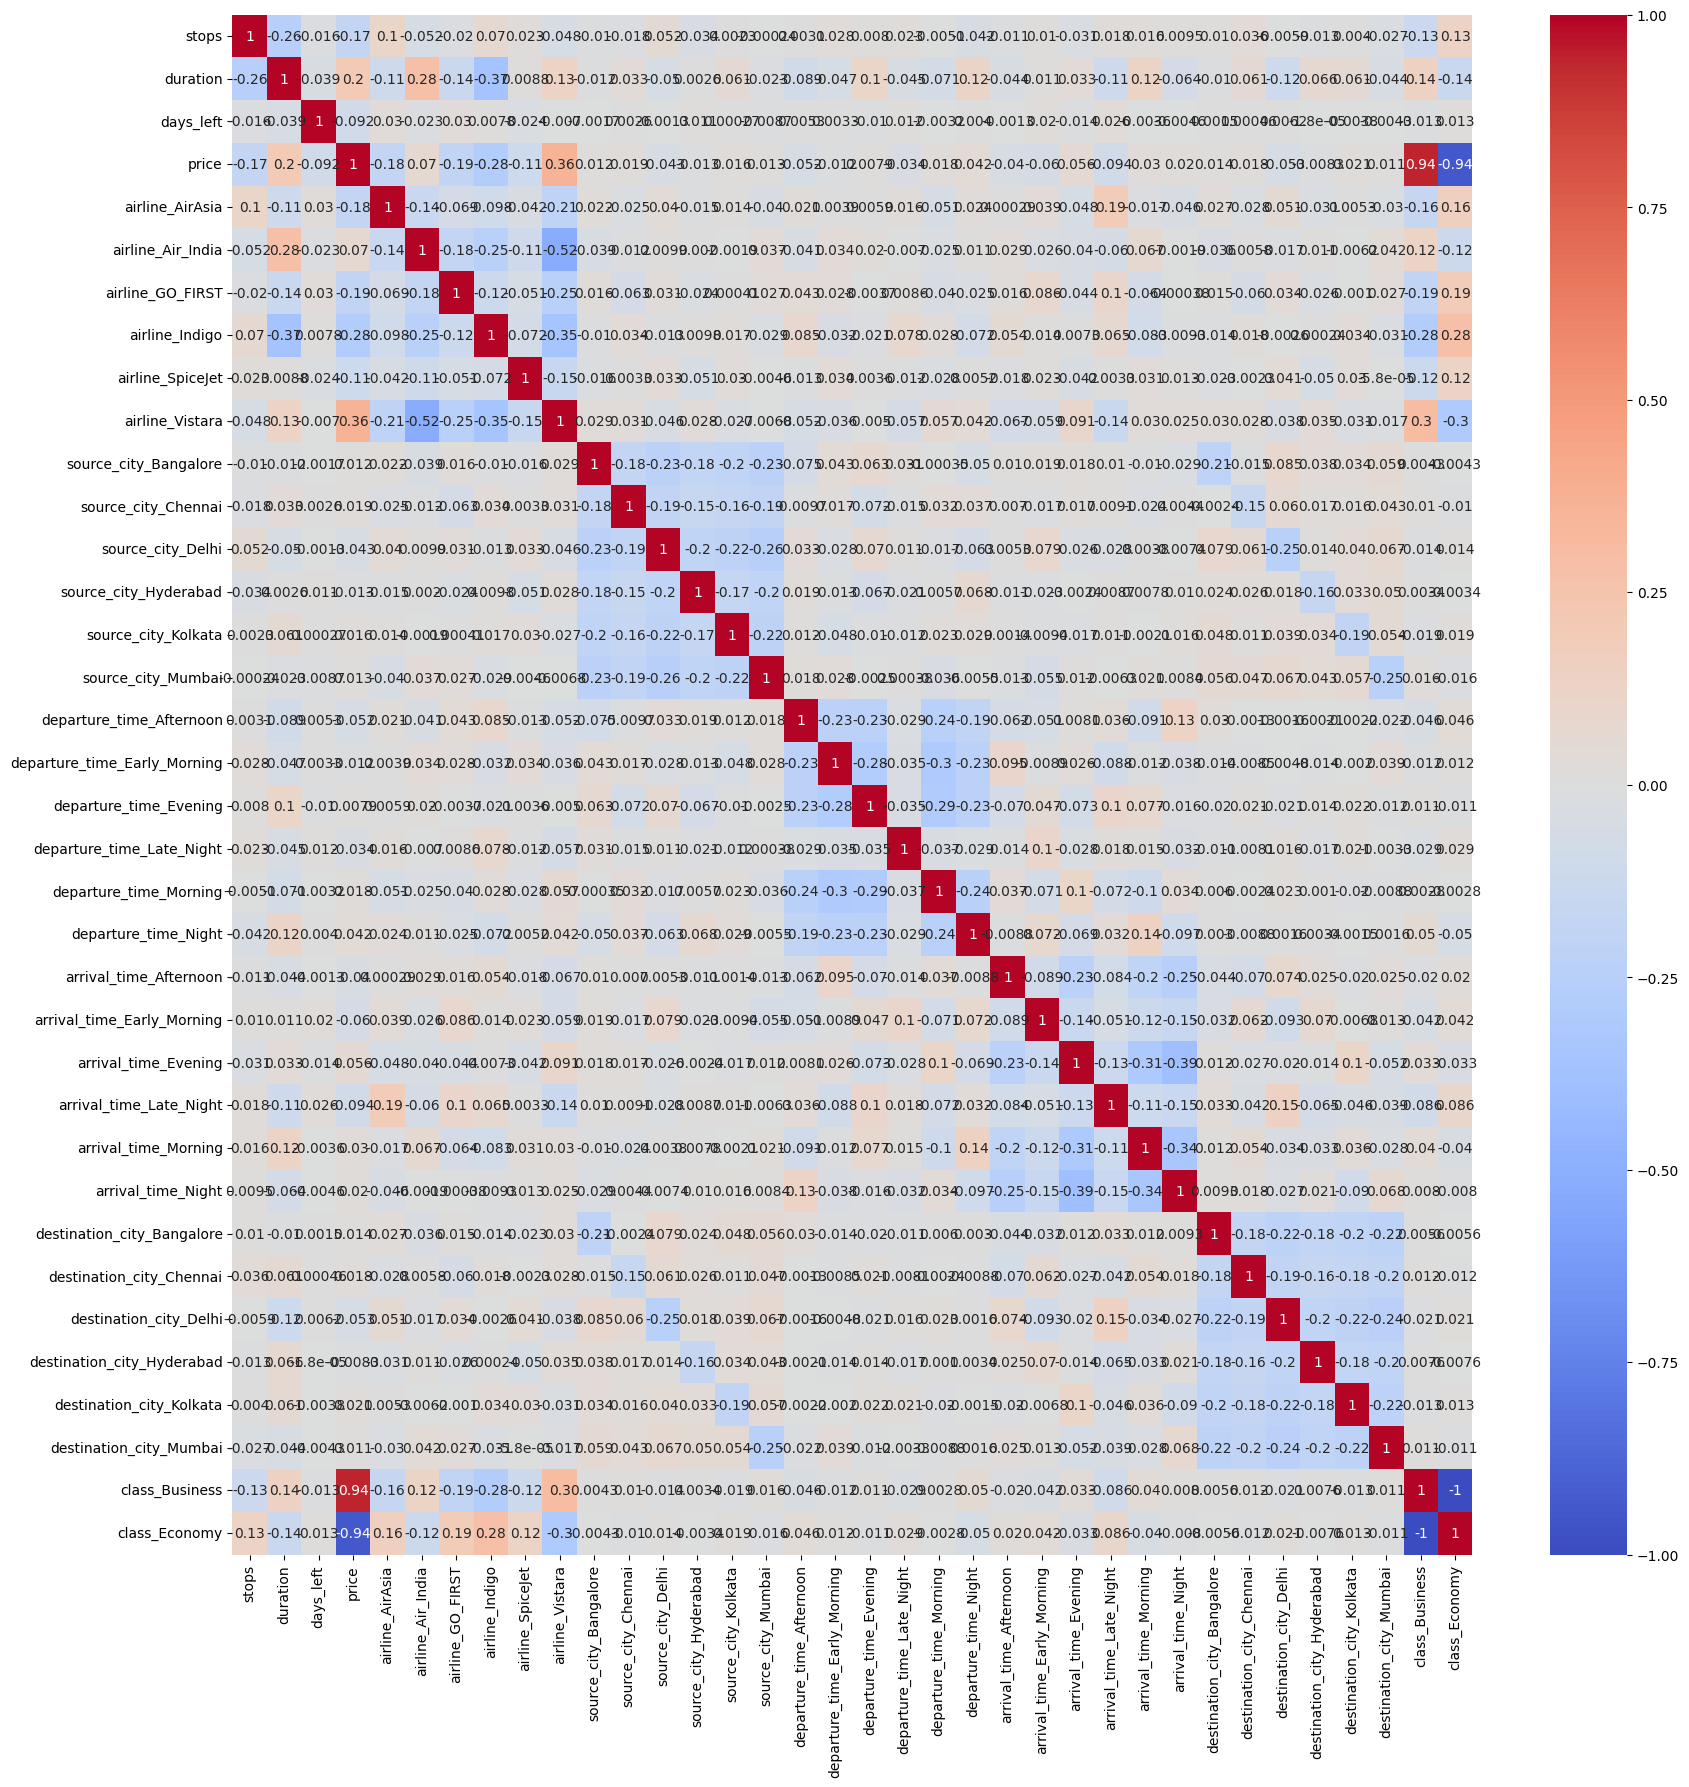

In [51]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_model.drop('price', axis=1))

vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif

/root/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


const                           0.000000
stops                           1.110503
duration                        1.475057
days_left                       1.005468
airline_AirAsia                      inf
airline_Air_India                    inf
airline_GO_FIRST                     inf
airline_Indigo                       inf
airline_SpiceJet                     inf
airline_Vistara                      inf
source_city_Bangalore                inf
source_city_Chennai                  inf
source_city_Delhi                    inf
source_city_Hyderabad                inf
source_city_Kolkata                  inf
source_city_Mumbai                   inf
departure_time_Afternoon             inf
departure_time_Early_Morning         inf
departure_time_Evening               inf
departure_time_Late_Night            inf
departure_time_Morning               inf
departure_time_Night                 inf
arrival_time_Afternoon               inf
arrival_time_Early_Morning           inf
arrival_time_Eve

In [53]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X = df_model.drop('price', axis=1)
Y = df_model['price']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = linear_model.LinearRegression()

In [58]:
model.fit(X_train, Y_train)

LinearRegression()

In [59]:
model.score(X_test, Y_test)

0.9043268318886551

In [60]:
params = pd.Series(model.coef_, index=X.columns)

In [61]:
params

stops                          -1.640790e+03
duration                        2.000955e+03
days_left                      -2.986747e+03
airline_AirAsia                 1.076834e+15
airline_Air_India               1.076834e+15
airline_GO_FIRST                1.076834e+15
airline_Indigo                  1.076834e+15
airline_SpiceJet                1.076834e+15
airline_Vistara                 1.076834e+15
source_city_Bangalore          -3.168243e+14
source_city_Chennai            -3.168243e+14
source_city_Delhi              -3.168243e+14
source_city_Hyderabad          -3.168243e+14
source_city_Kolkata            -3.168243e+14
source_city_Mumbai             -3.168243e+14
departure_time_Afternoon        8.929591e+14
departure_time_Early_Morning    8.929591e+14
departure_time_Evening          8.929591e+14
departure_time_Late_Night       8.929591e+14
departure_time_Morning          8.929591e+14
departure_time_Night            8.929591e+14
arrival_time_Afternoon          3.627416e+14
arrival_ti

In [62]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,trip
index,,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,1.0,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,1.0,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,1.0,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,1.0,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,1.0,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,0.0,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,0.0,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,0.0,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad


In [63]:
df_model2 = df.copy()
df_model2 = df_model2.drop(columns=['flight', 'source_city', 'destination_city', 'trip'])
df_model2 = pd.get_dummies(df_model2, columns=['airline', 'departure_time', 'arrival_time', 'class'], dtype=int)

In [64]:
df_model2.head()

,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,2.17,1,5953,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1.0,2.33,1,5953,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1.0,2.17,1,5956,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,2.25,1,5955,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,1.0,2.33,1,5955,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [65]:
X = df_model2.drop('price', axis=1)
Y = df_model2['price']

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
model = linear_model.LinearRegression()

In [69]:
model.fit(X_train, Y_train)

LinearRegression()

In [70]:
model.score(X_test, Y_test)

0.9003945822570153

In [71]:
params = pd.Series(model.coef_, index=X.columns)

In [72]:
params

stops                          -1.582207e+03
duration                        2.285325e+03
days_left                      -2.975608e+03
airline_AirAsia                -4.578010e+16
airline_Air_India              -4.578010e+16
airline_GO_FIRST               -4.578010e+16
airline_Indigo                 -4.578010e+16
airline_SpiceJet               -4.578010e+16
airline_Vistara                -4.578010e+16
departure_time_Afternoon       -2.876467e+16
departure_time_Early_Morning   -2.876467e+16
departure_time_Evening         -2.876467e+16
departure_time_Late_Night      -2.876467e+16
departure_time_Morning         -2.876467e+16
departure_time_Night           -2.876467e+16
arrival_time_Afternoon         -1.502695e+16
arrival_time_Early_Morning     -1.502695e+16
arrival_time_Evening           -1.502695e+16
arrival_time_Late_Night        -1.502695e+16
arrival_time_Morning           -1.502695e+16
arrival_time_Night             -1.502695e+16
class_Business                 -1.011006e+15
class_Econ

In [73]:
df_econom.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,trip
index,,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,1.0,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,1.0,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,1.0,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,1.0,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,1.0,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


In [74]:
df_econom['price'] = np.log(df_econom['price'])
df_econom_model = df_econom.copy()

df_econom_model = df_econom_model.drop(columns=['flight', 'trip', 'class'])
df_econom_model = pd.get_dummies(df_econom_model, columns=['airline', 'departure_time', 'arrival_time', 'source_city', 'destination_city'], dtype=int)

/tmp/ipykernel_105/258429863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econom['price'] = np.log(df_econom['price'])


In [75]:
X = df_econom_model.drop('price', axis=1)
Y = df_econom_model['price']

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
model_econom = linear_model.LinearRegression()

In [79]:
model.fit(X_train, Y_train)

LinearRegression()

In [80]:
model.score(X_test, Y_test)

0.5415504623913739

In [81]:
params = pd.Series(model.coef_, index=X.columns)

In [82]:
params

stops                          -2.570515e-02
duration                        1.456844e-01
days_left                      -4.663797e-01
airline_AirAsia                -5.403024e+09
airline_Air_India              -5.403024e+09
airline_GO_FIRST               -5.403024e+09
airline_Indigo                 -5.403024e+09
airline_SpiceJet               -5.403024e+09
airline_Vistara                -5.403024e+09
departure_time_Afternoon        7.621035e+09
departure_time_Early_Morning    7.621035e+09
departure_time_Evening          7.621035e+09
departure_time_Late_Night       7.621035e+09
departure_time_Morning          7.621035e+09
departure_time_Night            7.621035e+09
arrival_time_Afternoon         -2.310321e+10
arrival_time_Early_Morning     -2.310321e+10
arrival_time_Evening           -2.310321e+10
arrival_time_Late_Night        -2.310321e+10
arrival_time_Morning           -2.310321e+10
arrival_time_Night             -2.310321e+10
source_city_Bangalore           1.858014e+10
source_cit

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7afcbd8-9c88-4f31-abd6-4903a5bb3486' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>